<a href="https://colab.research.google.com/github/GergelyTuri/fiberphotometry/blob/main/notebooks/video_velocity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing mouse velocity
* 8/27 setting up
* 9/4 added to `fiberphotometry` repo
* 9/19 adding analysis tools to fiberphotometry -- compute velocity is still broken.
* 9/24 looks good
* 9/25 modifying again to match changes in the repo

In [ ]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

In [2]:
%cd ..

/content


In [ ]:
!git clone https://github.com/GergelyTuri/fiberphotometry.git
%cd fiberphotometry
!pip install .

In [ ]:
%cd /content/fiberphotometry/
!git pull

In [6]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sleep.base import core
from fiberphotometry.src import video
from fiberphotometry.src.behavior_dlc import Behavior as b
%matplotlib inline

In [5]:
dr = core.GoogleDrive()
mnt = dr.mount_drive()

Mounted at /gdrive


In [103]:
h5 = '/gdrive/Shareddrives/Turi_lab/Data/fiber_photometry/test_recordings/' \
    '1aflox22a_5-230819-164242/dlc/fiber_test_recordings-gergo-2023-09-25/' \
    'videos/EEGFP1c-230804-141830_1aflox22a_5-230819-164242_Cam1DLC_dlcrnetms5_fiber_test_recordingsSep25shuffle1_200000_filtered.h5'
video_path = '/gdrive/Shareddrives/Turi_lab/Data/fiber_photometry/test_recordings/1aflox22a_5-230819-164242/EEGFP1c-230804-141830_1aflox22a_5-230819-164242_Cam1.avi'
mouse_dir = os.path.join(os.path.split(video_path)[0])
mouse_dir


'/gdrive/Shareddrives/Turi_lab/Data/fiber_photometry/test_recordings/1aflox22a_5-230819-164242'

In [104]:
# initailizing the class
beh = b(f_path=h5)
# loading the the data
data = beh.data

In [105]:
vid = video.UsbVideo(video_path)
fr = vid.video_params['fps']

In [106]:
x_coords = data[(data.columns.values[0][0],
                 'mid_back', 'x')]
y_coords = data[(data.columns.values[0][0],
                 'mid_back', 'y')]

In [107]:
pdist = beh.pairwise_dist(x_coords)
dist_moved = beh.distance_moved(x_coords,
               y_coords)
dist_moved.sum()

6931.484410483447

22.33800970184804

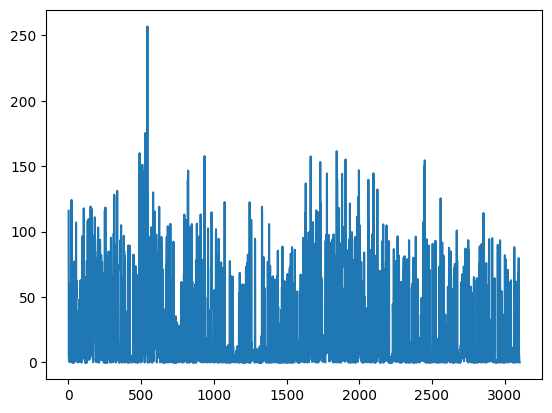

In [108]:
velo = beh.compute_velocity(x_coords, y_coords, fr)
mean_velo = velo.mean()
velo.plot()
mean_velo

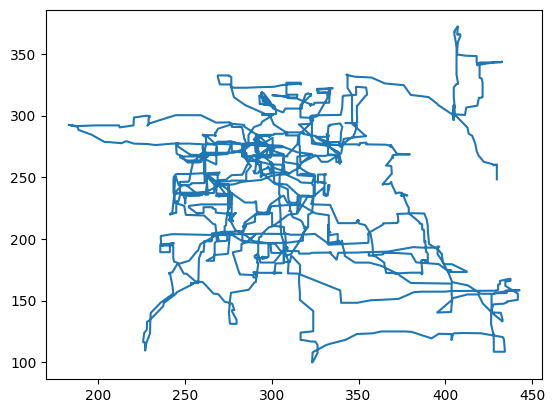

In [109]:
plt.plot(x_coords, y_coords)

0.00032216494845360824

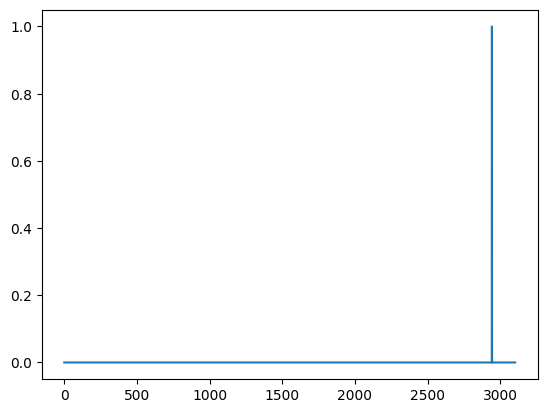

In [110]:
mob = beh.define_immobility(x_coords, y_coords)
mob.plot()
perc_immob = mob.sum()/len(mob)
perc_immob

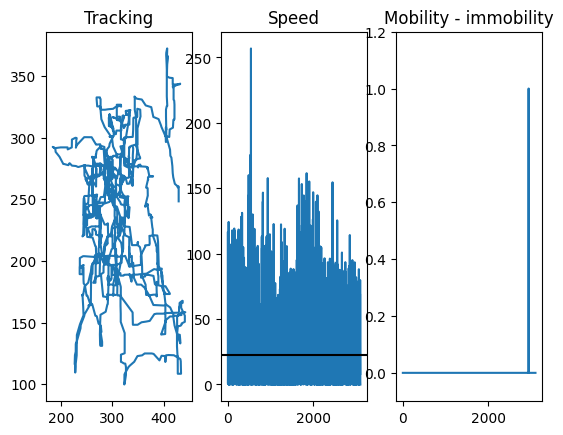

In [111]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(x_coords, y_coords)
axs[0].set_title('Tracking')
dist = beh.distance_moved(x_coords, y_coords)
x = np.linspace(0, len(data.index), num=len(data.index))
velo = beh.compute_velocity(x_coords, y_coords, fr)
axs[1].plot(x, velo)
axs[1].axhline(velo.mean(), color='k', label='ok')
axs[1].set_title('Speed')
# axs[1].set_ylim((-0.1, 10))

mob_immob = beh.define_immobility(x_coords, y_coords)
axs[2].plot(x, mob_immob)
axs[2].set_title('Mobility - immobility')
axs[2].set_ylim((-0.1, 1.2))
fig.savefig(os.path.join(mouse_dir, 'tacking analysis.png'),
            dpi=300, bbox_inches='tight')

In [112]:
summary_dict = {
    'mouse_id': '1aflox22a_5',
    'condition': 'light',
    'dist_moved': dist_moved.sum(),
    'mean_velo': mean_velo,
    'perc_immob': perc_immob
}

In [113]:
summary_df = pd.DataFrame.from_dict(summary_dict.items())
summary_df.to_csv(os.path.join(mouse_dir, 'tracking_summary.csv'),
                  index=False)